# Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [3]:
"""
This script is used for handwritten digit classification using a deep learning model.

Imports:
- tensorflow as tf: TensorFlow library for building and training deep learning models.
- tensorflow.keras: High-level API of TensorFlow for building neural networks.
- matplotlib.pyplot as plt: Matplotlib library for plotting graphs and visualizations.
- %matplotlib inline: Magic function to display plots inline in Jupyter notebooks.
- numpy as np: NumPy library for numerical operations and array manipulations.
"""
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np


# Importing necessary modules from keras
from keras.models import Sequential
from keras.layers import Dense
    

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

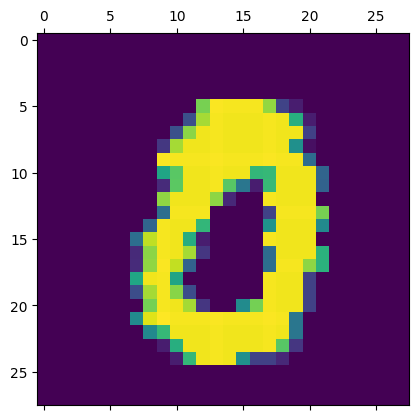

In [15]:
plt.matshow(X_train[69])

In [14]:
y_train[69]

np.uint8(0)

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

In [18]:
"""
Reshapes the training and test images from a 2D array (28x28) into a single dimension (784).
This operation is useful for converting each image into a flat feature vector that can
be directly processed by various machine learning or deep learning models.
"""
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

In [ ]:
X_train_flattened[0]

In [23]:
# Creating a Sequential model
model = Sequential([
    # Adding a Dense layer with 10 neurons, input shape of 784, and sigmoid activation function
    Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compiling the model with Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model with the training data (X_train_flattened and y_train) for 5 epochs
model.fit(X_train_flattened, y_train, epochs=5)

e:\Projects\ml-projects\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8093 - loss: 0.7325
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9103 - loss: 0.3154
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9201 - loss: 0.2857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9244 - loss: 0.2722
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9260 - loss: 0.2673


In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


array([2.2965647e-02, 4.7659483e-07, 6.7903720e-02, 9.6339482e-01,
       2.3945179e-03, 1.2591648e-01, 1.4098945e-06, 9.9977368e-01,
       1.3064341e-01, 7.1053380e-01], dtype=float32)

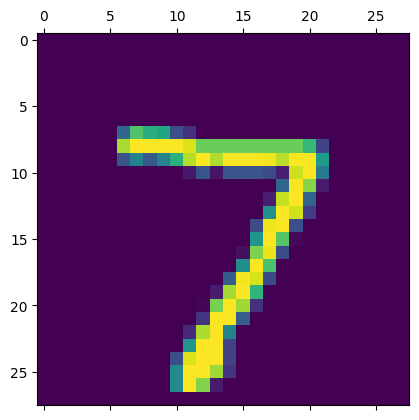

In [25]:
plt.matshow(X_test[0])

In [26]:
np.argmax(y_predicted[0])

np.int64(7)

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [29]:
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    6,    2,    2,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    8,  924,   17,    7,    4,   11,   10,   42,    3],
       [   3,    0,   18,  929,    1,   20,    2,    8,   21,    8],
       [   2,    1,    6,    2,  916,    0,    9,    4,   11,   31],
       [  10,    3,    3,   34,    9,  777,   16,    2,   31,    7],
       [  12,    3,    9,    1,    7,   11,  910,    2,    3,    0],
       [   1,    5,   24,    7,    8,    0,    0,  937,    5,   41],
       [   5,    6,    7,   23,    9,   25,    9,    9,  874,    7],
       [  11,    8,    1,   13,   29,    6,    0,   14,    5,  922]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

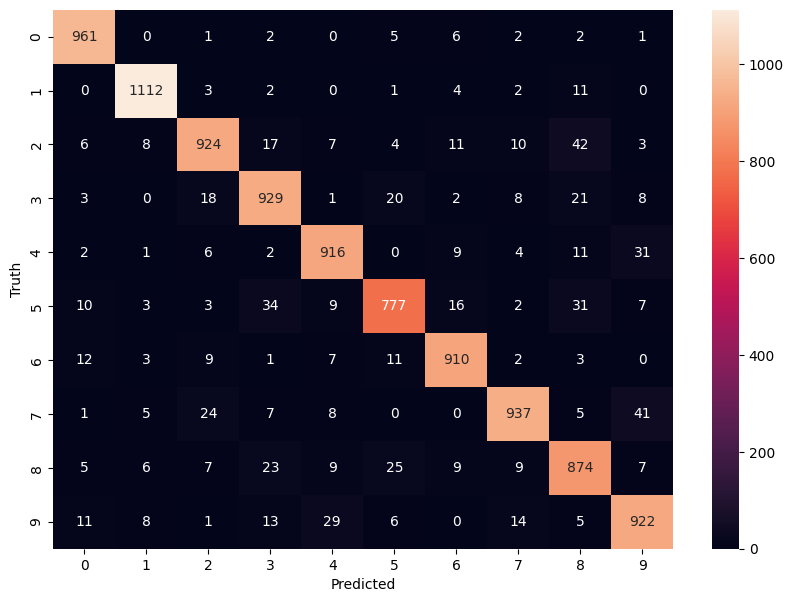

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Hidden Layer

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'), keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7740 - loss: 1.1285
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9464 - loss: 0.2575
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9653 - loss: 0.1441
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9723 - loss: 0.1027
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9805 - loss: 0.0775


In [39]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9657 - loss: 0.1215


[0.10759945213794708, 0.9702000021934509]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

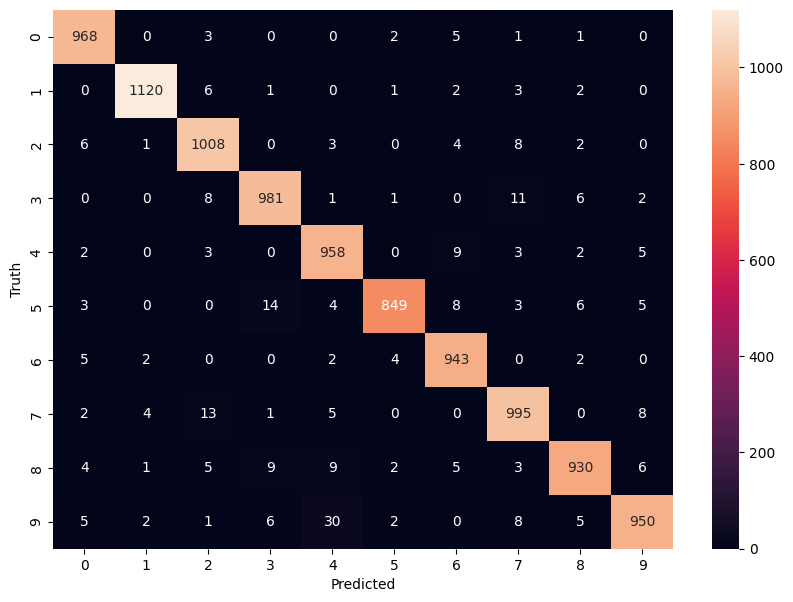

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10


e:\Projects\ml-projects\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8658 - loss: 0.4710
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9609 - loss: 0.1353
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0897
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9801 - loss: 0.0651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9844 - loss: 0.0507
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9882 - loss: 0.0409
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9901 - loss: 0.0338
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9922 - loss: 0.0270
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9931 - loss: 0.0236
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9943 - loss: 0.0196
